# Breast Cancer Analysis

In [1]:
# Import the necessary library
#for data cleaning/ scrubbing
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset
data = pd.read_csv("data.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
#checking the shape of the data
data.shape

(569, 33)

In [5]:
#checking the information that the data contains
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#handling missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#checing for duplicates
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Observation
- The Diagonsis column is the only column with object type.
- The ID column is the only colunm of the int type.
- The Unnamed: 32 is all null values.
- There is no duplicated values


## Data cleaning
- We will be dropping the ID and Unnamed: 32 column

In [9]:
#dropping the unnamed: 32 and id column
to_drop = data.drop(["Unnamed: 32","id"],axis = 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
# Replacing the M and B in the Diagnosis column with 1 and 0 respectively
# for easy visualization
data = data.replace(["M","B"],[1,0])
data.diagnosis.unique()
print(data['diagnosis'].value_counts()) # shows count of values ( 0 = benign, 1 = malignant)

0    357
1    212
Name: diagnosis, dtype: int64


In [12]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
#handling missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Observations:
>> 1. There is no missing vales in the data <br>
>> 2. There is no null columns in the data set <br>
>> 3. The dataset initially have 33 columns but now it <br>
have 31 columns is the columns we will be worng with.

Therefore the dataset is now said to be a cleaned dataset

# Data Visualization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

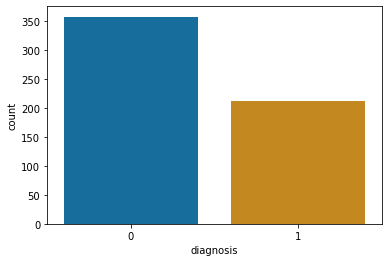

In [14]:
sns.countplot(data['diagnosis'], palette ='colorblind')

Text(0.5, 1.0, 'Plot_Diagnosis (M = 1, B = 0)')

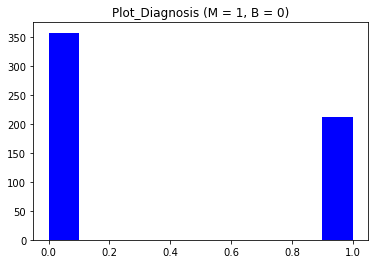

In [15]:
# malignant (cancerous) =1, benign (non-cancerous)= 0
plt.hist(data['diagnosis'], color = 'b')
plt.title('Plot_Diagnosis (M = 1, B = 0)') 

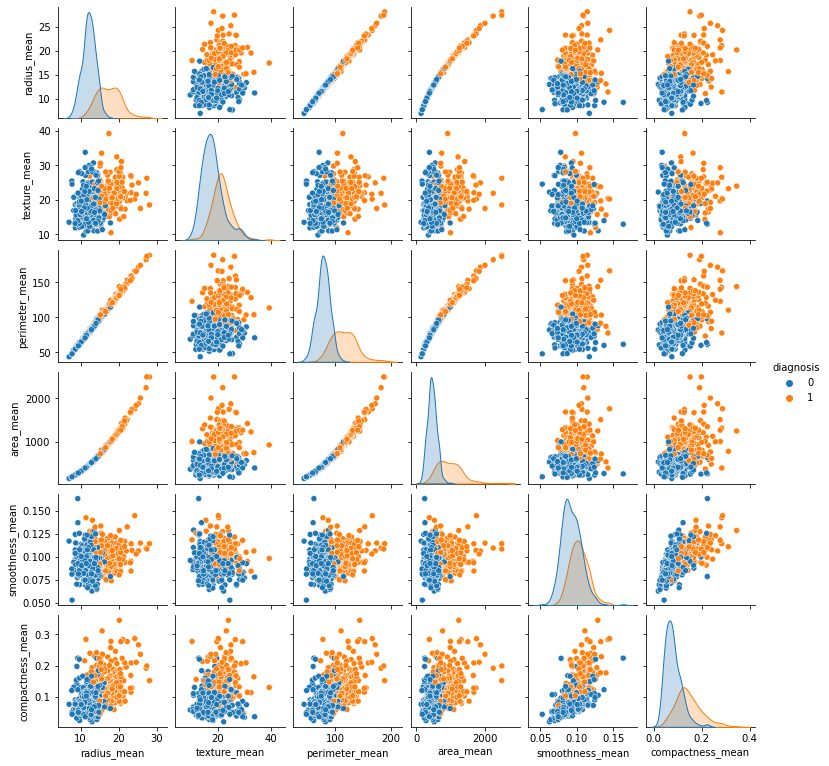

In [16]:
# Features distributions
sns.pairplot(data[data.columns[:7]], hue = "diagnosis",height = 1.8)

Text(0.5, 1.0, 'Correlation matrix')

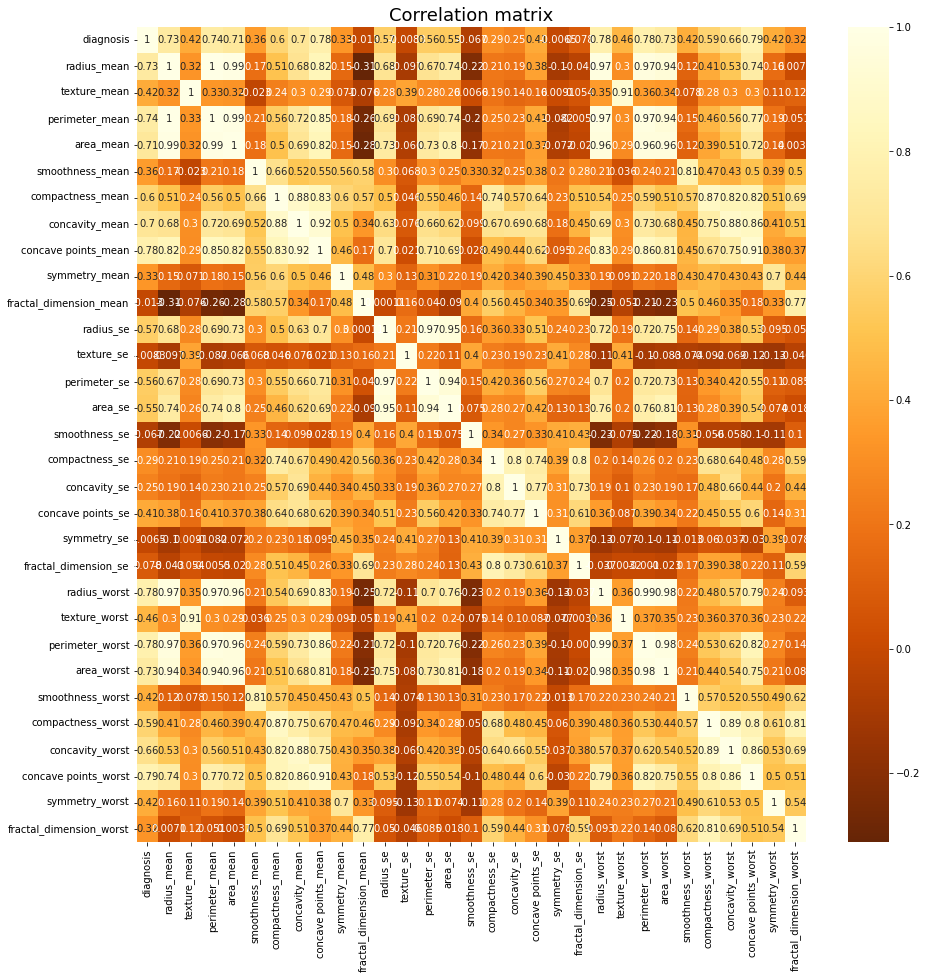

In [17]:
#Checking for correlation among the columns
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="YlOrBr_r",annot = True)
plt.title("Correlation matrix",fontsize = 18)

<AxesSubplot:title={'center':'Correlation with target (diagnosis)'}>

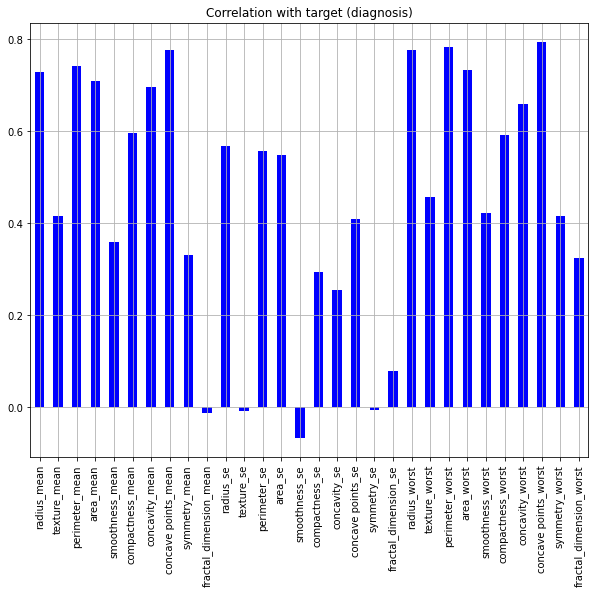

In [18]:
data.drop('diagnosis', axis=1).corrwith(data.diagnosis).plot(kind='bar', 
grid=True, figsize=(10, 8), title="Correlation with target (diagnosis)",color="blue")
#len(corr[abs(corr["diagnosis"])>0.5].index)

We have 15 columns that show correlation with the diagnosis column above 0.5<br>
These columns are:<br>
radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean,<br>
radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst,<br>
concavity_worst, concave points_worst

# Data Modeling

In [19]:
#Splitting data into train and test set
y =data["diagnosis"]
X =data.drop("diagnosis",axis=1)

In [20]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [22]:
X.shape,y.shape

((569, 30), (569,))

In [23]:
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.80,random_state=40)

In [24]:
#Checking the shapes of our train and test sets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [25]:
#feature scaling
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [26]:
#LogisticRegression Modeling
lr = LogisticRegression()

model1 =lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [27]:
#confusion matrix
Lg = confusion_matrix(y_test,prediction1)
Lg

array([[74,  1],
       [ 2, 37]], dtype=int64)

<AxesSubplot:>

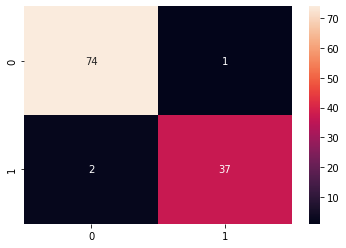

In [28]:

sns.heatmap(Lg, annot= True)
#plt.savefig('h.png')   

In [29]:
# Accurancy of Logistic Regression
TP = Lg[0][0]
TN = Lg[1][1]
FN = Lg[1][0]
FP = Lg[0][1]
print('Testing Accuracy:' , (TP+TN)/(TP+TN+FN+FP)) 

Testing Accuracy: 0.9736842105263158


A confusion matrix is a table that categorizes predictions according to whether they match the actual value

True Positive (TP): Malignant tumour correctly classified as Malignant

True Negative (TN): Benign tumour correctly classified as benign

False Positive (FP): Benign tumour incorrectly classified as malignant

False Negative (FN): Malignant tumour incorrectly classified as benign
Metrics


In [30]:
accuracy_score(y_test,prediction1) # Testing Data Accuracy

0.9736842105263158

# Conclusion
The analysis is done with machine learning logistics regression modeling,<br>
if the tumor is predited to be maglinant that means the paitience is a cancer patient but<br>
if its not maglinant, that means is just begnin which is not cancerous.

**The accuracy of this project is 97%**